In [ ]:
#|default_exp app

In [19]:
#|export
from fastai.vision.all import *
import gradio as gr

is_cat = lambda x: x[0].isupper()

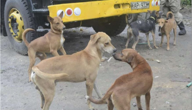

In [9]:
im = PILImage.create("dog.jpg")
im.thumbnail((192, 192))
im


In [10]:
#|export
learner = load_learner("model.pkl")

In [12]:
learner.predict(im)

('False', TensorBase(0), TensorBase([1.0000e+00, 1.0027e-06]))

In [16]:
#|export
categories = ("Dog", "Cat")

def classify_image(img):
    prediction, index, probs = learner.predict(img)
    return dict(zip(categories, map(float, probs)))

In [17]:
classify_image(im)

{'Dog': 0.9999990463256836, 'Cat': 1.0026775498772622e-06}

In [20]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'unknown.jpg']

interface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
interface.launch(inline=False)

/home/krm/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/krm/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/krm/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/krm/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Export

In [24]:
import nbdev

In [25]:
nbdev.export.nb_export("app.ipynb", ".")